In [20]:
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [21]:
df = pd.read_csv('heart.csv')

In [22]:
df.sample(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
643,65,1,0,120,177,0,1,140,0,0.4,2,0,3,1
468,61,1,2,150,243,1,1,137,1,1.0,1,0,2,1
231,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1


In [23]:
X = df.drop('target', axis=1)
Y = df['target']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [25]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier())
])

In [26]:
param_grid = [
    {
        'model': [RandomForestClassifier(random_state=42)],
        'model__n_estimators': [50, 100],
        'model__max_depth': [None, 10, 20]
    },
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],
        'model__weights': ['uniform', 'distance'],
        'model__p': [1, 2]
    },
    {
        'model': [SVC()],
        'model__C': [0.1, 1, 10],
        'model__kernel': ['linear', 'rbf'],
        'model__gamma': ['scale', 'auto']
    },
    {
        'model': [LogisticRegression(max_iter=1000, solver='liblinear')],
        'model__C': [0.01, 0.1, 1, 10],
        'model__penalty': ['l1', 'l2']
    },
]

In [27]:
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=2,
    scoring='accuracy',
    n_jobs=-1
)
grid_search.fit(X_train, Y_train)

,estimator,Pipeline(step...lassifier())])
,param_grid,"[{'model': [RandomForestC...ndom_state=42)], 'model__max_depth': [None, 10, ...], 'model__n_estimators': [50, 100]}, {'model': [KNeighborsClassifier()], 'model__n_neighbors': [3, 5, ...], 'model__p': [1, 2], 'model__weights': ['uniform', 'distance']}, ...]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,2
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [28]:
y_pred_grid = grid_search.predict(X_test)
accuracy_score(Y_test, y_pred_grid)

1.0

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

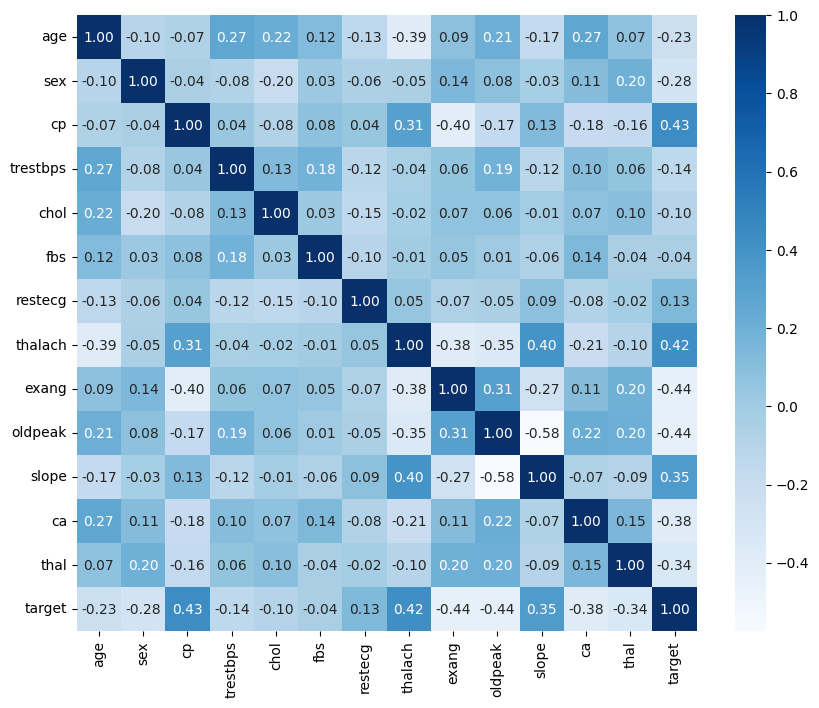

In [34]:
kore = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(kore, annot=True, cmap='Blues', fmt='.2f')
plt.show()

In [29]:
print(classification_report(Y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [30]:
import pickle
import joblib

In [ ]:
joblib.dump(grid_search.best_estimator_, 'pipeline_jantung.joblib')
print("Pipeline terbaik berhasil disimpan sebagai 'pipeline_jantung.joblib'")

Pipeline terbaik berhasil disimpan sebagai 'pipeline_jantung.joblib'


In [32]:
# joblib.dump(grid_search, 'Real_Jantung.joblib') ini error saat prediksi di streamlit